### Mapping Dallas income & affordable unit density

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format ='retina'

In [ ]:
yardi = pd.read_csv('yardi_acs_CURRENT.csv')
dallas_sub = gpd.read_file('../Research Project/Shapefiles/Dallas - Suburban.shp')
dallas_north = gpd.read_file('../Research Project/Shapefiles/Dallas - North.shp')

In [ ]:
dallas_sub = dallas_sub[['Submarket', 'geometry']]
dallas_north = dallas_north[['Submarket', 'geometry']]

In [ ]:
dallas_north = dallas_north.to_crs(dallas_sub.crs)

In [ ]:
dallas_sub['Submarket'] = dallas_sub['Submarket'].str.lower()
dallas_north['Submarket'] = dallas_north['Submarket'].str.lower()

def clean_locality(text):
    text = text.replace(' - ', '_')
    txet = text.replace(' ', '_')
    return text
    
dallas_sub['Submarket'] = dallas_sub['Submarket'].apply(clean_locality)
dallas_north['Submarket'] = dallas_north['Submarket'].apply(clean_locality)

In [ ]:
dallas_sub = dallas_sub.merge(yardi, on='Submarket')
dallas_north = dallas_north.merge(yardi, on='Submarket')

In [ ]:
dallas_sub.set_index('Submarket')
dallas_north.set_index('Submarket')

In [ ]:
dallas = pd.concat([dallas_sub, dallas_north], ignore_index=True)

In [ ]:
dallas['Area'] = dallas.area
dallas['Boundary'] = dallas.boundary

In [ ]:
ax = dallas.plot(column='Median_Income_2010', legend=True)

lowest_values = dallas.nsmallest(5, 'Median_Income_2010')
for idx, row in lowest_values.iterrows():
    ax.annotate(text=row['Submarket'], xy=(row.geometry.centroid.x, row.geometry.centroid.y), 
                xytext=(3, 3), textcoords='offset points', fontsize=8, color='red', 
                weight='bold')

ax.set_title('Median Income in 2010 - Dallas Submarkets', fontsize=12)
ax.set_xlabel('Longitude', fontsize=10)
ax.set_ylabel('Latitude', fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=5)

plt.show()

In [ ]:
ax = dallas.plot(column='Median_Income_2022', legend=True)

lowest_values = dallas.nsmallest(5, 'Median_Income_2022')
for idx, row in lowest_values.iterrows():
    ax.annotate(text=row['Submarket'], xy=(row.geometry.centroid.x, row.geometry.centroid.y), 
                xytext=(3, 3), textcoords='offset points', fontsize=8, color='red', 
                weight='bold')

ax.set_title('Median Income in 2022 - Dallas Submarkets', fontsize=12)
ax.set_xlabel('Longitude', fontsize=10)
ax.set_ylabel('Latitude', fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=5)

plt.show()

In [ ]:
ax = dallas.plot(column='Housing2010_New Builds_Aff_2010-23', legend=True)

lowest_values = dallas.nlargest(5, 'Housing2010_New Builds_Aff_2010-23')
for idx, row in lowest_values.iterrows():
    ax.annotate(text=row['Submarket'], xy=(row.geometry.centroid.x, row.geometry.centroid.y), 
                xytext=(3, 3), textcoords='offset points', fontsize=8, color='red', 
                weight='bold')

ax.set_title('New Aff. Housing Builds (2010-23) - Dallas Submarkets', fontsize=11)
ax.set_xlabel('Longitude', fontsize=10)
ax.set_ylabel('Latitude', fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=5)

plt.show()

### Mapping Fort Worth income and density

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format ='retina'

In [2]:
yardi = pd.read_csv('yardi_acs_CURRENT.csv')
worth = gpd.read_file('../Research Project/Shapefiles/Fort Worth.shp')

In [4]:
worth = worth[['Submarket', 'geometry']]

In [5]:
worth['Submarket'] = worth['Submarket'].str.lower()

def clean_locality(text):
    text = text.replace(' - ', '_')
    text = text.replace(' ', '_')
    return text
    
worth['Submarket'] = worth['Submarket'].apply(clean_locality)

/users/lkemp/.local/lib/python3.11/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [7]:
worth = worth.merge(yardi, on='Submarket')
worth.set_index('Submarket')

,geometry,City,MSA,DP02_0001E_2010,DP02_0043E_2010,DP02_0044E_2010,DP02_0058E_2010,DP02_0059E_2010,DP02_0060E_2010,DP02_0061E_2010,...,Black_2010,American_Indian_Alaskan_2010,Asian_2010,Pacific_Islander_2010,Other_Race_2010,None_2010,Hispanic_or_Latino_2010,White_Alone_2010,Bach_Plus_Count_2010,Bachelors_Plus_2010
Submarket,,,,,,,,,,,,,,,,,,,,,
arlington_central,"POLYGON ((-97.09747 32.71916, -97.09749 32.718...",Arlington,Dallas-Fort Worth,13849,662,306,21397,2912,2845,5062,...,0.121316,0.017843,0.107350,0.002469,0.133556,1,0.402581,0.355212,5147,0.240548
arlington_east,"POLYGON ((-97.06231 32.73579, -97.06182 32.735...",Arlington,Dallas-Fort Worth,13575,1070,622,22515,3967,4314,7663,...,0.154235,0.016180,0.048754,0.000498,0.153594,1,0.566026,0.226002,1618,0.071863
arlington_north,"POLYGON ((-97.08622 32.75978, -97.08700 32.759...",Arlington,Dallas-Fort Worth,26170,799,272,36549,918,1873,7002,...,0.233735,0.010732,0.062755,0.001834,0.065715,1,0.200214,0.508489,14761,0.403869
arlington_south,"POLYGON ((-97.08395 32.58887, -97.10469 32.611...",Arlington,Dallas-Fort Worth,46783,3772,1351,81338,5718,6747,21011,...,0.273551,0.010558,0.099741,0.001635,0.108607,1,0.254923,0.369702,20354,0.250240
arlington_southwest,"POLYGON ((-97.13417 32.64821, -97.13416 32.648...",Arlington,Dallas-Fort Worth,16741,837,343,29390,405,1576,6573,...,0.118764,0.013313,0.060691,0.000880,0.041987,1,0.101996,0.703849,10588,0.360259
arlington_west,"POLYGON ((-97.14952 32.67766, -97.14952 32.677...",Arlington,Dallas-Fort Worth,26337,1580,1005,46095,1647,2462,10216,...,0.097083,0.010043,0.038662,0.001155,0.038824,1,0.139330,0.718023,16749,0.363358
fort_worth_central,"POLYGON ((-97.34236 32.75811, -97.34315 32.763...",Fort Worth,Dallas-Fort Worth,3062,68,10,6887,616,1310,1942,...,0.352360,0.022691,0.012203,0.001714,0.072207,1,0.191105,0.424566,1406,0.204153
fort_worth_central_east,"POLYGON ((-97.24582 32.69374, -97.24712 32.693...",Fort Worth,Dallas-Fort Worth,16580,2176,1319,29769,5668,6155,8628,...,0.424857,0.005966,0.021823,0.000981,0.155409,1,0.419578,0.140180,3381,0.113575
fort_worth_central_north,"POLYGON ((-97.35408 32.78628, -97.35412 32.784...",Fort Worth,Dallas-Fort Worth,13648,2129,1080,27546,9115,6286,7275,...,0.047968,0.007386,0.003021,0.000000,0.461373,1,0.797899,0.148268,794,0.028825


In [10]:
worth_filtered = worth[worth['City'].str.contains("Fort Worth", case=False, na=False)]
worth = worth[worth['City'].str.contains("Fort Worth", case=False, na=False)]

In [8]:
worth['Area'] = worth.area
worth['Boundary'] = worth.boundary

/tmp/ipykernel_1534730/2927957230.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  worth['Area'] = worth.area


#### Map of lowest income submarkets

Submarkets with the lowest median income in 2022:
                   Submarket  Median_Income_2022
24  fort_worth_western_hills        34690.164866
9   fort_worth_central_south        47718.799727
7    fort_worth_central_east        49282.345013
27      fort_worth_woodhaven        49398.916968
8   fort_worth_central_north        53842.940685


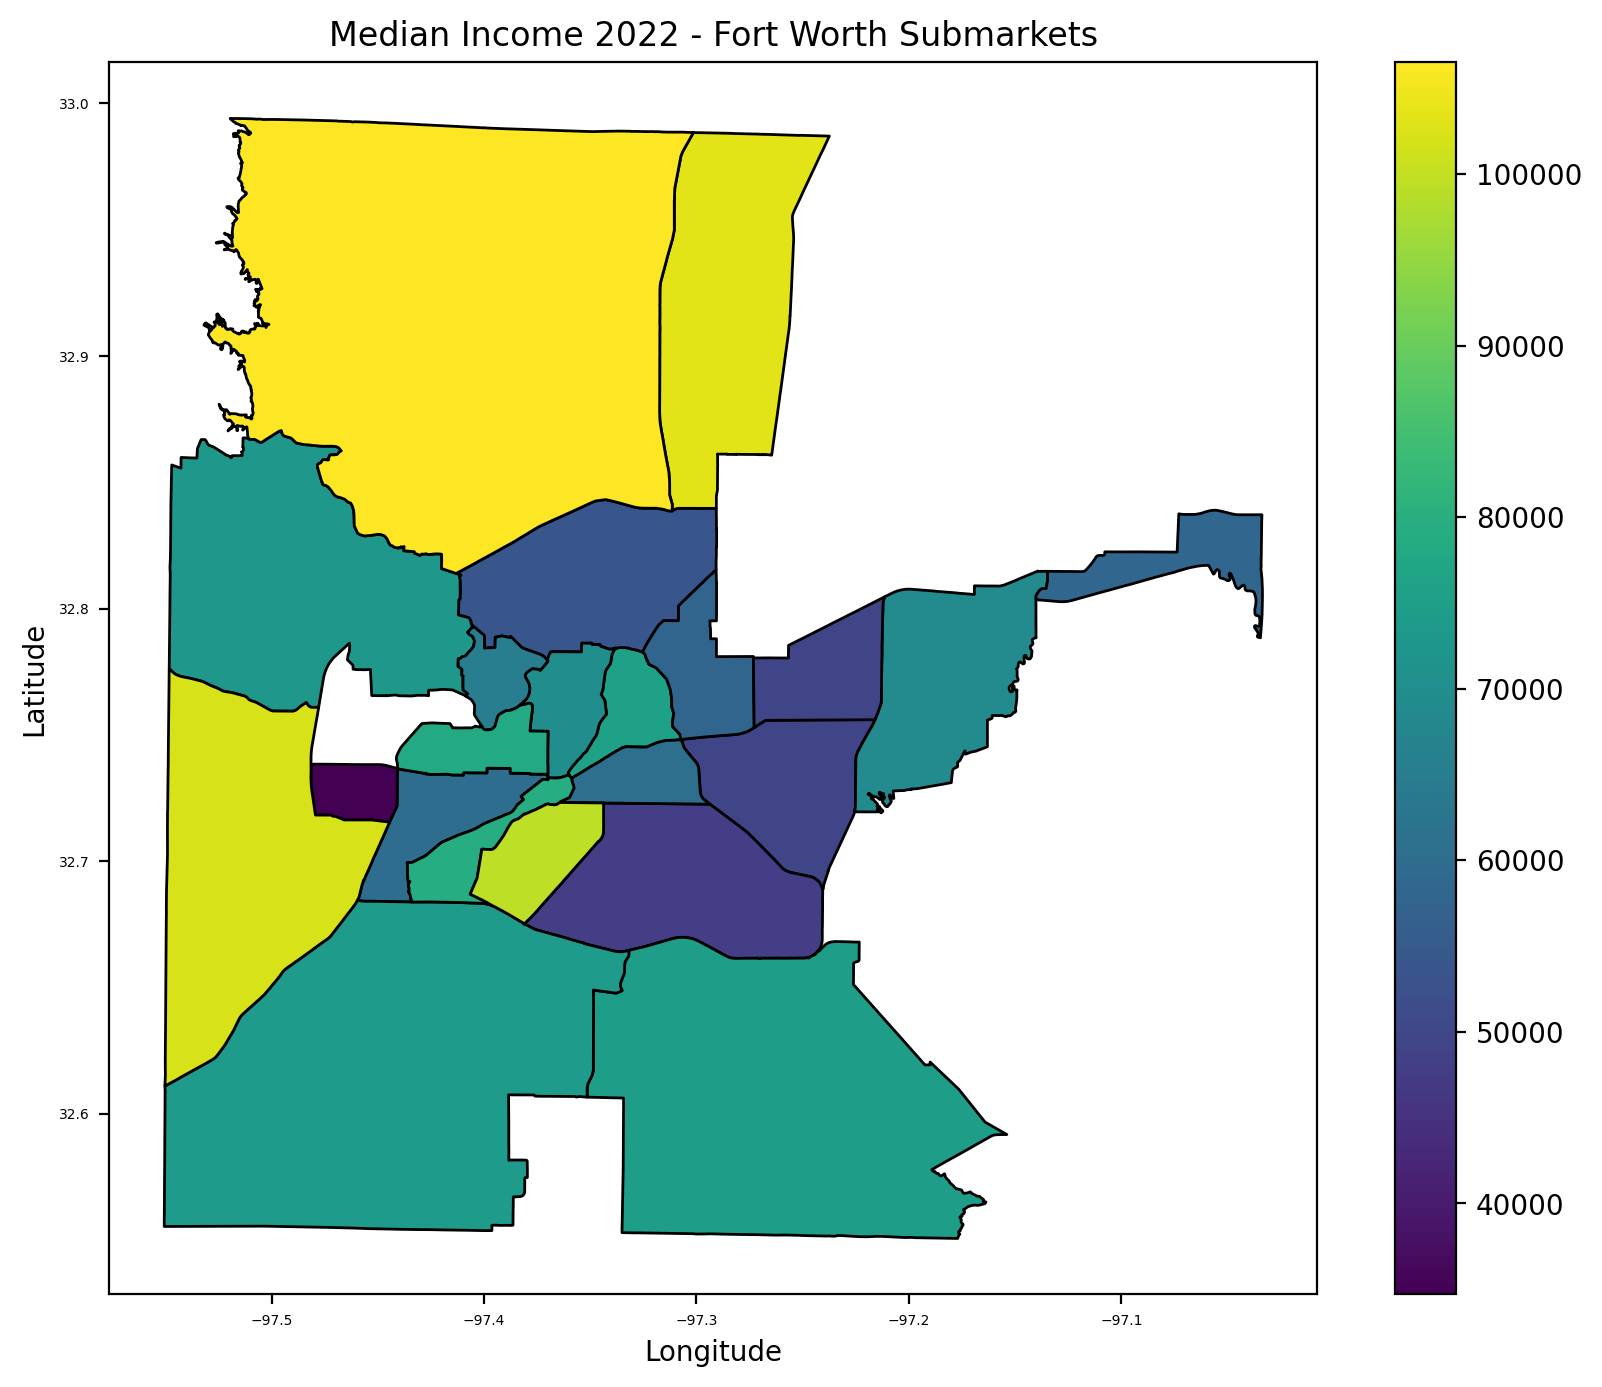

In [16]:
ax = worth.plot(column='Median_Income_2022', legend=True, edgecolor='black', figsize=(10, 8))

# Identify the 5 lowest values
lowest_values = worth.nsmallest(5, 'Median_Income_2022')

# Plot the centroids of the submarkets with the lowest values in red
#lowest_values['centroid'] = lowest_values.geometry.centroid
#lowest_values.set_geometry('centroid').plot(ax=ax, color='red', markersize=20, label='Lowest Submarkets')

# Add title and axis labels
ax.set_title('Median Income 2022 - Fort Worth Submarkets', fontsize=12)
ax.set_xlabel('Longitude', fontsize=10)
ax.set_ylabel('Latitude', fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=5)

# Print the list of submarkets with the smallest values to the console
print("Submarkets with the lowest median income in 2022:")
print(lowest_values[['Submarket', 'Median_Income_2022']])

plt.savefig('median_income_ftworth.png')

plt.show()

#### Map of most affordable housing

In [ ]:
worth['Total_Aff'] = worth['Housing2010_Inventory_Aff_2010'] + worth['Housing2010_New Builds_Aff_2010-23'] + worth['Housing2023_Inventory_Aff_2023']

In [ ]:
ax = worth.plot(column='Total_Aff', legend=True, edgecolor='black')

# Identify the 5 lowest values
highest_values = worth.nlargest(5, 'Total_Aff')

# Plot the centroids of the submarkets with the lowest values in red
#highest_values['centroid'] = highest_values.geometry.centroid
#highest_values.set_geometry('centroid').plot(ax=ax, color='red', markersize=20)

# Add title and axis labels
ax.set_title('Affordable Housing 2010-23 - Fort Worth Submarkets', fontsize=12)
ax.set_xlabel('Longitude', fontsize=10)
ax.set_ylabel('Latitude', fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=5)

# Print the list of submarkets with the smallest values to the console
print("Submarkets with the lowest median income in 2022:")
print(highest_values[['Submarket', 'Total_Aff']])

plt.savefig('affordable_units_map_ftworth.png')

plt.show()

#### Moer map

In [26]:
# AFF new builds / (renter occupied)
worth['metric'] = worth['New Builds_Aff_2010-23'] / worth['DP04_0001E_2022']

Submarkets with the lowest median income in 2022:
                   Submarket    metric
8   fort_worth_central_north  0.258276
24  fort_worth_western_hills  0.125256
9   fort_worth_central_south  0.106148
13     fort_worth_lake_worth  0.087634
19      fort_worth_southeast  0.078890


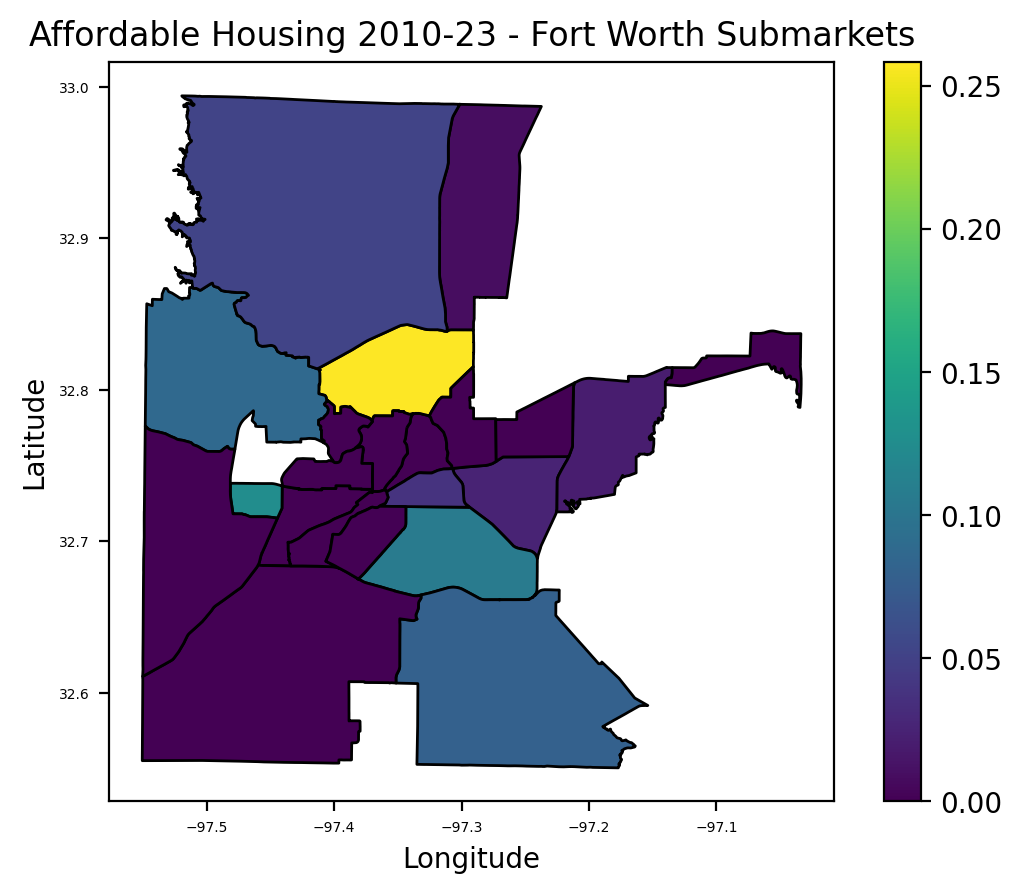

In [27]:
ax = worth.plot(column='metric', legend=True, edgecolor='black')

# Identify the 5 lowest values
highest_values = worth.nlargest(5, 'metric')

# Plot the centroids of the submarkets with the lowest values in red
#highest_values['centroid'] = highest_values.geometry.centroid
#highest_values.set_geometry('centroid').plot(ax=ax, color='red', markersize=20)

# Add title and axis labels
ax.set_title('Affordable Housing 2010-23 - Fort Worth Submarkets', fontsize=12)
ax.set_xlabel('Longitude', fontsize=10)
ax.set_ylabel('Latitude', fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=5)

# Print the list of submarkets with the smallest values to the console
print("Submarkets with the lowest median income in 2022:")
print(highest_values[['Submarket', 'metric']])

plt.savefig('affordable_units_map_ftworth.png')

plt.show()